In [1]:
#!/bin/env python
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import fwdpy11 as fp11
import fwdpy11.wright_fisher as wf
import fwdpy11.model_params as model_params
import numpy as np
import fwdpy11.sampling
import libsequence.polytable as polyt
from libsequence.summstats import PolySIM
import pandas as pd
from libsequence.windows import Windows
import sys
import pickle
figsize(12, 6)

Populating the interactive namespace from numpy and matplotlib


# European Humans

## Torres model

In [2]:
Nstart = 18449

### 200 Generations of constant size

In [3]:
before = np.array([Nstart]*200,dtype=np.uint32)


### Demographic event 1: ancestral growth

In [4]:
ancestral_expansion_size = 2.10709*Nstart
ancestral_expansion_time_span = int(0.437017*2*Nstart)
ancestral_expansion = np.array([ancestral_expansion_size]*ancestral_expansion_time_span,dtype=np.uint32)
ancestral_expansion


array([38873, 38873, 38873, ..., 38873, 38873, 38873], dtype=uint32)

### Demographic event 2: Out-of-Africa (OOA) bottleneck

In [5]:
OOA_bottleneck_size = 0.322295*Nstart
OOA_bottleneck_time_span = int(0.109481*2*Nstart) # 2180
OOA_bottleneck = np.array([OOA_bottleneck_size]*OOA_bottleneck_time_span,dtype=np.uint32)
OOA_bottleneck

array([5946, 5946, 5946, ..., 5946, 5946, 5946], dtype=uint32)

### Demographic event 3: European population bottleneck followed by immediate exponential growth

In [6]:
European_bottleneck_size = 0.184986*Nstart
European_bottleneck_growth_time_span = int(0.0529262*2*Nstart) #1060
final_European_size = 4.43931*Nstart
x = np.linspace(np.log(European_bottleneck_size), np.log(final_European_size), European_bottleneck_growth_time_span)
European_bottleneck = np.exp(x).round().astype(np.int32)


In [7]:
demog_torres = np.concatenate((before,ancestral_expansion,OOA_bottleneck,European_bottleneck)).astype(np.int32)
print('total generations:',(ancestral_expansion_time_span+OOA_bottleneck_time_span+European_bottleneck_growth_time_span))

total generations: 22116


In [8]:
torres_df = pd.DataFrame(demog_torres,columns=['N'])
torres_df['generation'] = (torres_df.index - 200)/Nstart
torres_df.to_csv('torres.csv',index=False)

## Tennessen model

In [9]:
Nstart = 7310

### 200 Generations of constant size

In [10]:
before = np.array([Nstart]*200,dtype=np.uint32)


### Demographic event 1: ancestral growth

In [11]:
ancestral_expansion_size = 1.98*Nstart
ancestral_expansion_time_span = int(0.264196*2*Nstart)
ancestral_expansion = np.array([ancestral_expansion_size]*ancestral_expansion_time_span,dtype=np.uint32)
ancestral_expansion

array([14473, 14473, 14473, ..., 14473, 14473, 14473], dtype=uint32)

### Demographic event 2: Out-of-Africa (OOA) bottleneck

In [12]:
OOA_bottleneck_size = 0.254609*Nstart 
OOA_bottleneck_time_span = int(0.0763702*2*Nstart)
OOA_bottleneck = np.array([OOA_bottleneck_size]*OOA_bottleneck_time_span,dtype=np.uint32)
OOA_bottleneck

array([1861, 1861, 1861, ..., 1861, 1861, 1861], dtype=uint32)

### Demographic event 3: Demographic event 3: European bottleneck followed by intermediate exponential growth

In [13]:
European_bottleneck_size = 0.141184*Nstart
intermediate_European_size = 1.339863*Nstart #this is the size after the end of intermediate exponential growth and before the start of accelerated growth (see below)
European_bottleneck_intermediate_exponential_growth_time_span = int(0.0502841*2*Nstart)
x = np.linspace(np.log(European_bottleneck_size), np.log(intermediate_European_size), European_bottleneck_intermediate_exponential_growth_time_span)
European_intermediate = np.exp(x).round().astype(np.int32)

### Demographic event 4: final accelerated exponential growth

In [14]:
final_European_size = 70.048896039 *Nstart #this is the size after the end of accelerated exponential growth (contemporary European effective size)
final_accelerated_exponential_growth_time_span = int(0.0139949*2*Nstart)
x = np.linspace(np.log(intermediate_European_size), np.log(final_European_size), final_accelerated_exponential_growth_time_span)
European_final = np.exp(x).round().astype(np.int32)

In [15]:
demog_tennessen = np.concatenate((before,ancestral_expansion,OOA_bottleneck,European_intermediate,European_final)).astype(np.int32)

print('total generations:',(ancestral_expansion_time_span+OOA_bottleneck_time_span+European_bottleneck_intermediate_exponential_growth_time_span+final_accelerated_exponential_growth_time_span))
      

total generations: 5917


In [16]:
tennessen_df = pd.DataFrame(demog_tennessen,columns=['N'])
tennessen_df['generation'] = (tennessen_df.index - 200)/Nstart
tennessen_df.to_csv('tennessen.csv',index=False)

# Maize

In [17]:
Nstart = 12278#3

### 200 Generations of constant size

In [18]:
before = np.array([Nstart]*200,dtype=np.uint32)


In [19]:
Nbneck = 0.0526*Nstart
Nfinal = 2.98*Nstart
bneck_time = int(0.12*Nstart)
x = np.linspace(np.log(Nbneck), np.log(Nfinal), bneck_time)
bneck_maize = np.exp(x).round().astype(np.int32)
demog_maize = np.concatenate((before,bneck_maize)).astype(np.int32)


In [20]:
maize_df = pd.DataFrame(demog_maize,columns=['N'])
maize_df['generation'] = (maize_df.index - 200)/Nstart
maize_df.to_csv('maize.csv',index=False)

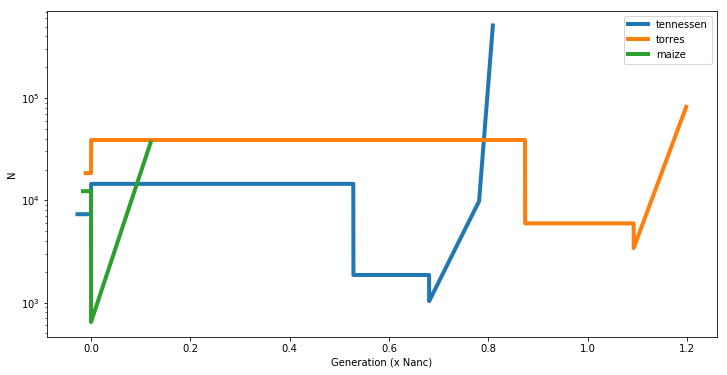

In [30]:
plt.plot(tennessen_df.generation,tennessen_df.N, linewidth=4.0,label='tennessen')
plt.plot(torres_df.generation,torres_df.N, linewidth=4.0,label='torres')
plt.plot(maize_df.generation,maize_df.N, linewidth=4.0,label='maize')
plt.yscale('log')
plt.ylabel('N')
plt.xlabel('Generation (x Nanc)')
plt.legend()